In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Fields.csv
# r  |  z  |  Er | Ez
# Electric current = info[0] 
# Distance scaling to meter = multiply by info[1] 
# Electric Field (Er, Ez) scaling to V/m = multiply by info[2]
# Velocity scaling to m/s = multiply by info[3];
# Extractor voltage = info[6]; 

#EXTRACTOR_DIST = info[10]; //extractor distance
#EXTRACTOR_APETURE_DIA = info[11]; //extractor width
#EXTRACTOR_THICKNESS = info[12]; //extractor thickness

info = np.loadtxt('E_field/info.txt')
convert_dist=info[1] 
convert_E=info[2]
convert_vel=info[3]



# Load the csv file
df = pd.read_csv('E_field/Fields.csv')

# Convert the DataFrame to a numpy array
Field = df.values
r=Field[:,0]*convert_dist
z=Field[:,1]*convert_dist
Er=Field[:,2]*convert_E
Ez=Field[:,3]*convert_E

In [3]:
print('max r=',np.max(r))
print('max z=',np.max(z))
print('max Er=',np.log10(np.max(Er)))
print('max Ez=',np.log10(np.max(Ez)))

max r= 0.00030000000000000003
max z= 0.0007000000000000001
max Er= 8.797410441569472
max Ez= 9.008882742467755


In [4]:
def interpolate (r,z,Field):
    Er=0
    Ez=0
    return Er,Ez

## 1- Check the Mesh

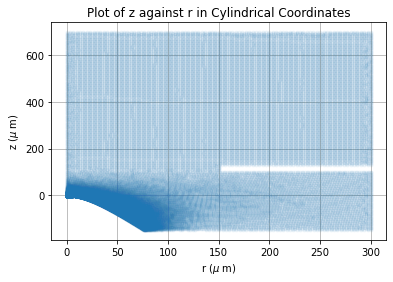

In [5]:
plt.figure()
plt.plot(r*1e6, z*1e6, '.',alpha=0.05)
plt.xlabel('r ($\mu$ m)')
plt.ylabel('z ($\mu$ m)')
plt.title('Plot of z against r in Cylindrical Coordinates')
plt.grid(True)
plt.show()

## 2- Probability ditribution

In [6]:
prob = np.loadtxt('E_field/prob.txt')
R = np.loadtxt('E_field/r.txt')*convert_dist
Z = np.loadtxt('E_field/z.txt')*convert_dist
vr = np.loadtxt('E_field/v_r.txt')*convert_vel
vz = np.loadtxt('E_field/v_z.txt')*convert_vel


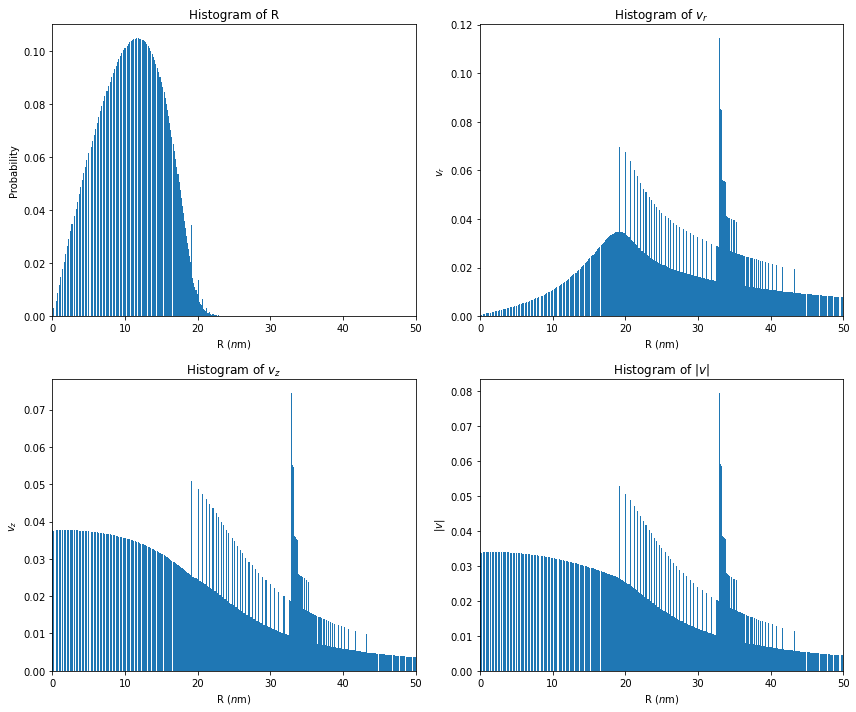

In [7]:
import matplotlib.pyplot as plt
import numpy as np

vabs = np.sqrt(vr**2 + vz**2)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # Create a grid of 2x2 subplots

# Define data for each subplot
data = [
    (R[0:500]*1e9, prob[0:500], 'Probability', 'Histogram of R'),
    (R[0:500]*1e9, vr[0:500], '$v_r$', 'Histogram of $v_r$'),
    (R[0:500]*1e9, vz[0:500], '$v_z$', 'Histogram of $v_z$'),
    (R[0:500]*1e9, vabs[0:500], '$|v|$', 'Histogram of $|v|$')
]

# Iterate over each subplot and plot the data
for ax, (x, y, ylabel, title) in zip(axs.flatten(), data):
    ax.hist(x, weights=y, bins=500, density=True)
    ax.set(xlabel='R ($n$m)', ylabel=ylabel, title=title, xlim=[0, 50])

plt.tight_layout()
plt.show()


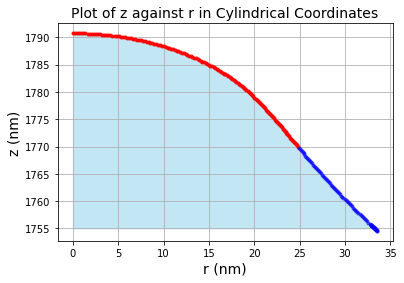

In [8]:
plt.figure()
plt.plot(R[0:150]*1e9, Z[0:150]*1e9, 'r.',alpha=0.9)
plt.plot(R[150:250]*1e9, Z[150:250]*1e9, 'b.',alpha=0.5)

plt.fill_between(R[0:250]*1e9, Z[0:250]*1e9,1755, color='skyblue', alpha=0.5)
plt.title('Plot of z against r in Cylindrical Coordinates',fontsize=14)
plt.xlabel('r (nm)',fontsize=14)
plt.ylabel('z (nm)',fontsize=14)
plt.grid(True)
plt.show()

In [28]:
# Normalize histogram to get probabilities
probabilities = prob / prob.sum()

In [29]:
# Choose n indices based on the probabilities
n = 100000 # change this to the number you want
indices = np.random.choice(np.arange(len(probabilities)), size=n, p=probabilities)

In [38]:
P0=0  # Percentage of neutrals
P1=60 # Percentage of monomers
P2=20 # Percentage of dimers
P3=20 # Percentage of trimes

# Given particles and their probabilities
particles = np.array([0, 1, 2, 3])
probabilities = np.array([P0, P1, P2, P3])  # Replace P0, P1, P2, P3 with the actual probabilities

# Normalizing probabilities (making sure they add up to 1)
probabilities = probabilities / probabilities.sum()

# Generate the array
n = 10000  # Replace with the desired number of elements
generated_particles = np.random.choice(particles, size=n, p=probabilities)

print(generated_particles)



[1 2 1 ... 1 1 2]


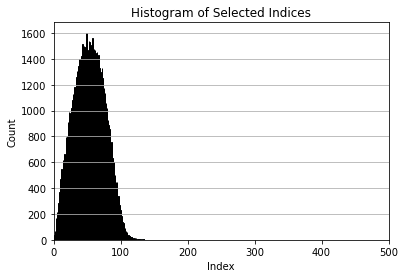

In [39]:
# Plot the histogram of the selected indices
plt.hist(indices,bins=250, edgecolor='black')

plt.xlabel('Index')
plt.ylabel('Count')
plt.title('Histogram of Selected Indices')
plt.grid(axis='y')
plt.xlim([0, 500])
plt.show()

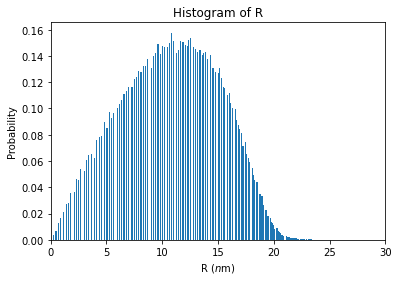

In [40]:

plt.hist(R[indices]*1e9,bins=250,density=True)
plt.xlabel('R ($n$m)')  # Label for the x-axis
plt.ylabel('Probability')  # Label for the y-axis
plt.title('Histogram of R')  # Title for the plot
plt.xlim([0, 30])
plt.show()

### 3- Generate Functions

In [41]:
def injection_conditions(n,prob,ri,zi,vri,vzi):
    '''
    prob: Non-normalized probabilities
    n: Number of particles
    indices: Indices of the injected particles
    '''
    probabilities = prob / prob.sum()
    np.random.seed(123)    # set the random number generator seed
    indices = np.random.choice(np.arange(len(probabilities)), size=n, p=probabilities) # Indices are distributes based on prob
    theta_i=np.random.uniform(0, 2*np.pi, np.size(indices)) # The angle is uniformly distributed
    x=ri[indices]*np.cos(theta_i)
    y=ri[indices]*np.sin(theta_i)
    z=zi[indices]
    vx=vri[indices]*np.cos(theta_i)
    vy=vri[indices]*np.sin(theta_i)
    vz=vzi[indices] 
    init_posvel=np.column_stack((x,y,z,vx,vy,vz))
    return init_posvel



def species(n,Pneut,Pmono,Pdim,Ptrim):
    
    # Neutrals-->0 ;Monomers-->1, dimers -->2 ; Trimers -->3 
    particles = np.array([0, 1, 2, 3]) 
    probabilities = np.array([Pneut,Pmono, Pdim, Ptrim])  
    # Normalizing probabilities (making sure they add up to 1)
    probabilities = probabilities / probabilities.sum()
    # Generate the array
    particle_types = np.random.choice(particles, size=n, p=probabilities)
    
    return particle_types

In [42]:
n=10000
Pneut=10
Pmono=40
Pdim=40
Ptrim=10
prob = np.loadtxt('E_field/prob.txt')
ri = np.loadtxt('E_field/r.txt')*convert_dist  # r initial condition
zi = np.loadtxt('E_field/z.txt')*convert_dist  # z initial condition
vri = np.loadtxt('E_field/v_r.txt')*convert_vel # vr initial condition
vzi = np.loadtxt('E_field/v_z.txt')*convert_vel # vz initial condition

def IC_conditions (n,prob,ri,zi,vri,vzi,Pneut,Pmono,Pdim,Ptrim):
    
    def injection_conditions(n,prob,ri,zi,vri,vzi):
        probabilities = prob / prob.sum()
        np.random.seed(123)    # set the random number generator seed
        indices = np.random.choice(np.arange(len(probabilities)), size=n, p=probabilities) # Indices are distributes based on prob
        theta_i=np.random.uniform(0, 2*np.pi, np.size(indices)) # The angle is uniformly distributed
        x=ri[indices]*np.cos(theta_i)
        y=ri[indices]*np.sin(theta_i)
        z=zi[indices]
        vx=vri[indices]*np.cos(theta_i)
        vy=vri[indices]*np.sin(theta_i)
        vz=vzi[indices] 
        init_posvel=np.column_stack((x,y,z,vx,vy,vz))
        return init_posvel
    
    
    def species(n,Pneut,Pmono,Pdim,Ptrim):
    
        # Neutrals-->0 ; Monomers-->1, dimers -->2 ; Trimers -->3
        particles = np.array([0, 1, 2, 3]) 
        probabilities = np.array([Pmono, Pdim, Ptrim, Pneut])  
        # Normalizing probabilities (making sure they add up to 1)
        probabilities = probabilities / probabilities.sum()
        # Generate the array
        particle_types = np.random.choice(particles, size=n, p=probabilities)
        
        return particle_types
    
    

    amu2kg= 1.66053906660 *1e-27 # converts amu to kg
    e2C= 1.602176634 *1e-19 # converts electron charge to Coulomb
    init_posvel=injection_conditions(n,prob,ri,zi,vri,vzi)
    particle_types=species(n,Pneut,Pmono,Pdim,Ptrim)
    charges=np.sign(particle_types)*e2C
    mass_list=np.array([197.973,111.168,309.141,507.114])*amu2kg  # mass in kg: neutral, monomer, dimer, trimer 
    masses=np.array([[mass_list[i] for i in list(particle_types)]]).T  # mass of the entire set of particles
    IC=np.column_stack(( init_posvel,particle_types,masses,charges))
    return IC

IC=IC_conditions (n,prob,ri,zi,vri,vzi,Pneut,Pmono,Pdim,Ptrim)


In [43]:
IC=IC_conditions (n,prob,ri,zi,vri,vzi,Pneut,Pmono,Pdim,Ptrim)
IC

array([[-7.31710102e-09, -1.20493208e-08,  1.78570897e-06, ...,
         0.00000000e+00,  3.28741901e-25,  0.00000000e+00],
       [ 4.57038482e-09, -7.22318304e-09,  1.78900198e-06, ...,
         1.00000000e+00,  1.84598807e-25,  1.60217663e-19],
       [ 3.43251838e-09, -6.87988168e-09,  1.78934380e-06, ...,
         1.00000000e+00,  1.84598807e-25,  1.60217663e-19],
       ...,
       [-1.82415092e-08,  6.55785372e-09,  1.77993812e-06, ...,
         0.00000000e+00,  3.28741901e-25,  0.00000000e+00],
       [-1.26487759e-09,  7.36392316e-09,  1.78942382e-06, ...,
         2.00000000e+00,  5.13340708e-25,  1.60217663e-19],
       [-2.42827986e-09,  1.27569270e-08,  1.78653889e-06, ...,
         1.00000000e+00,  1.84598807e-25,  1.60217663e-19]])

In [44]:
IC=IC_conditions (n,prob,ri,zi,vri,vzi,Pneut,Pmono,Pdim,Ptrim)
pos=IC[:,0:3]
vel=IC[:,3:6]
species=IC[:,6]
mass=IC[:,7]
charge=IC[:,8]

In [45]:
from collections import Counter

# Assuming species is your list
species_counts = Counter(species)

print(species_counts)

Counter({1.0: 4025, 0.0: 4018, 2.0: 1022, 3.0: 935})


In [46]:
v_norm=np.sqrt(vri**2+vzi**2)
v_norm[0:10]

array([0.56906723, 0.5624067 , 0.56674427, 0.56771426, 0.56828249,
       0.56849328, 0.56857034, 0.56856156, 0.56848397, 0.56835197])

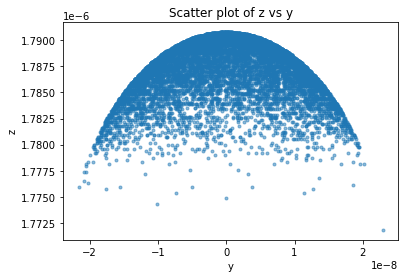

In [47]:
# assuming pos is your array
x = pos[:,0]  # x-coordinate
y = pos[:,1]  # y-coordinate
z = pos[:,2]  # z-coordinate


plt.plot(y, z, '.',alpha=0.5)
plt.xlabel('y')
plt.ylabel('z')
plt.title('Scatter plot of z vs y')
plt.show()

In [48]:
import plotly.graph_objects as go

In [49]:
probabilities = prob / prob.sum()


fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=1,
        color=probabilities,                # set color to temperature values
        colorscale='Plotly3',    # choose a colorscale
        opacity=0.2,
        colorbar=dict(           # add a colorbar
            title="Probability",
            titleside="right"
        )
    )
)])

# Set labels
fig.update_layout(scene = dict(
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z'),
                    width=700,
                    margin=dict(r=20, l=10, b=10, t=10))

fig.show()


In [20]:
# Define your color and size arrays
colors = ['black', 'red', 'green', 'blue']
sizes = [1.5, 1, 2.5, 4]
species_names = ["Neutral", "Monomer", "Dimer", "Trimer"]
opacities = [0.4,0.4,.4,.1]
# Initiate an empty data list
data = []

# Create a separate trace for each species type
for i in range(4):
    indices = [j for j, x in enumerate(species) if x == i]  # indices of each species type
    trace = go.Scatter3d(
        x=[x[j] for j in indices],
        y=[y[j] for j in indices],
        z=[z[j] for j in indices],
        mode='markers',
        marker=dict(
            size=sizes[i],
            color=colors[i],       # Set color
            opacity=opacities[i]
        ),
        hoverinfo='none',
        showlegend=False  # We don't want to show these in the legend
    )
    data.append(trace)

    # Invisible traces for larger legend markers
    trace_legend = go.Scatter3d(
        x=[None],
        y=[None],
        z=[None],
        mode='markers',
        marker=dict(
            size=sizes[i],
            color=colors[i],
            opacity=1
        ),
        name=species_names[i],  # The name now reflects the species name
        legendgroup=species_names[i],
        showlegend=True
    )
    data.append(trace_legend)

# Create a figure
fig = go.Figure(data=data)

# Set labels
fig.update_layout(scene = dict(
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z'),
                    width=700,
                    margin=dict(r=20, l=10, b=10, t=10))

fig.show()


In [118]:
import plotly.graph_objects as go
import numpy as np

# Define your color and size arrays
colors = ['black', 'red', 'green', 'blue']
sizes = [1.5, 1, 2.5, 4]
species_names = ["Neutral", "Monomer", "Dimer", "Trimer"]
opacities = [0.4,0.4,.4,.1]

# Initiate an empty data list
data = []

# Create a separate trace for each species type
for i in range(4):
    indices = [j for j, x in enumerate(species) if x == i]  # indices of each species type
    trace = go.Scatter3d(
        x=[x[j] for j in indices],
        y=[y[j] for j in indices],
        z=[z[j] for j in indices],
        mode='markers',
        marker=dict(
            size=sizes[i],
            color=colors[i],       # Set color
            opacity=opacities[i]
        ),
        hoverinfo='none',
        showlegend=False  # We don't want to show these in the legend
    )
    data.append(trace)

    # Invisible traces for larger legend markers
    trace_legend = go.Scatter3d(
        x=[None],
        y=[None],
        z=[None],
        mode='markers',
        marker=dict(
            size=sizes[i],
            color=colors[i],
            opacity=1
        ),
        name=species_names[i],  # The name now reflects the species name
        legendgroup=species_names[i],
        showlegend=True
    )
    data.append(trace_legend)

# Create a surface below your scatter plot
x_range = np.linspace(min(x), max(x), 10)
y_range = np.linspace(min(y), max(y), 10)
x_grid, y_grid = np.meshgrid(x_range, y_range)
z_value = min(z)  # set your z value to be the minimum z-value
surface = go.Surface(x=x_grid, y=y_grid, z=z_value*np.ones_like(x_grid), colorscale=[[0, 'grey'], [1, 'grey']], showscale=False, opacity=0.5)
data.append(surface)

# Create a figure
fig = go.Figure(data=data)

# Set labels and set z-axis range
fig.update_layout(scene = dict(
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z',
                    zaxis_range=[min(z),max(z)]),  # Set the range of z-axis
                    width=700,
                    margin=dict(r=20, l=10, b=10, t=10))

fig.show()


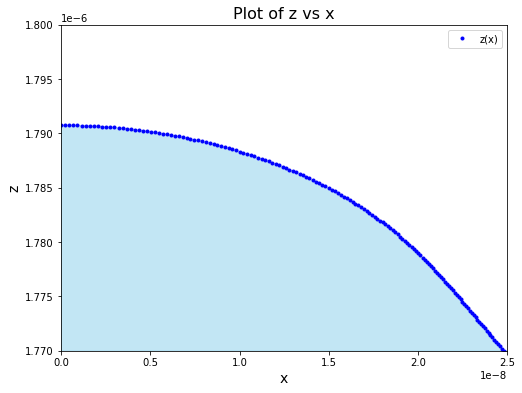

In [225]:
# Assuming x_values and z_values are your data


# Create a new plot
plt.figure(figsize=(8, 6))

# Plot the curve
plt.plot(ri, zi, '.',label='z(x)', color='blue')
plt.xlim([0, 25*1e-9])
plt.ylim([1770*1e-9, 1800*1e-9])
# Fill the space under the curve
plt.fill_between(ri, zi,1770*1e-9, color='skyblue', alpha=0.5)

# Add labels, legend, and a title
plt.xlabel('x', fontsize=14)
plt.ylabel('z', fontsize=14)
plt.title('Plot of z vs x', fontsize=16)
plt.legend()


# Display the plot
plt.show()


In [229]:
#need to plot in 3d
#Change 2

In [230]:
# Function comes here